# Data Source and Contents

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [3]:
print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


In [4]:
## check for missing values
print(df.isnull().sum())
#there is no missing values so it is okay

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


In [5]:
#Splitting the data into test and train 
train_data = df[df['flag']== 'train']
test_data = df[df['flag']== 'test']

In [6]:
x_train = pd.get_dummies(train_data[['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin','education_bin', 'workclass_bin', 'age_bin']], prefix=['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin','education_bin', 'workclass_bin', 'age_bin'])
x_test = pd.get_dummies(test_data[['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin','education_bin', 'workclass_bin', 'age_bin']], prefix=['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin','education_bin', 'workclass_bin', 'age_bin'])
y_train = pd.get_dummies(train_data[['y']])
y_test = pd.get_dummies(test_data[['y']])

In [7]:
#importing the Naive Bayes algorithm module Gaussian which is used in classification; it assumes that features follow normal distribution
from sklearn.naive_bayes import GaussianNB 

# using Gaussian Naive Bayes Algorithm
model = GaussianNB()

In [8]:
# Training Naive bayes classifier
print ("Training Model using Gaussian Naive Bayes algorithm .....")
t = model.fit(x_train, np.ravel(y_train))
print ("Training completed")

Training Model using Gaussian Naive Bayes algorithm .....
Training completed


In [9]:
#Test the unseen passangers from test dataset
print ("testing trained model to predict Test Data labels")
y_predicted = model.predict(x_test)
print ("Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:")

testing trained model to predict Test Data labels
Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:


# Finding Optimal Value of a Key Ensemble Method Hyper-Parameter

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np

n_estimators_range = range(1, 100, 5)

accuracy_scores = []
auc_scores = []

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(x_train, np.ravel(y_train))
    accuracy_scores.append(rf.score(x_test, y_test))
    auc_scores.append(metrics.roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))


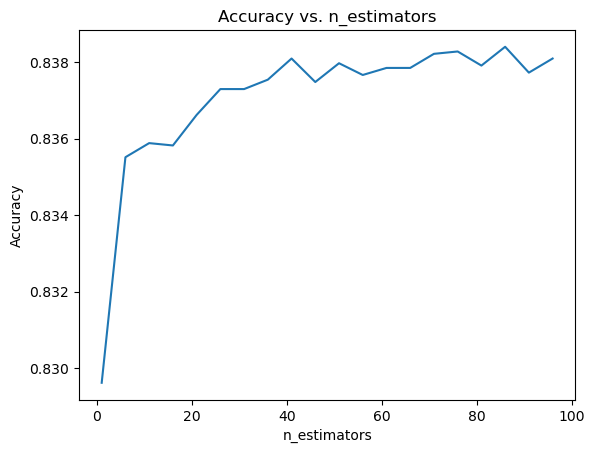

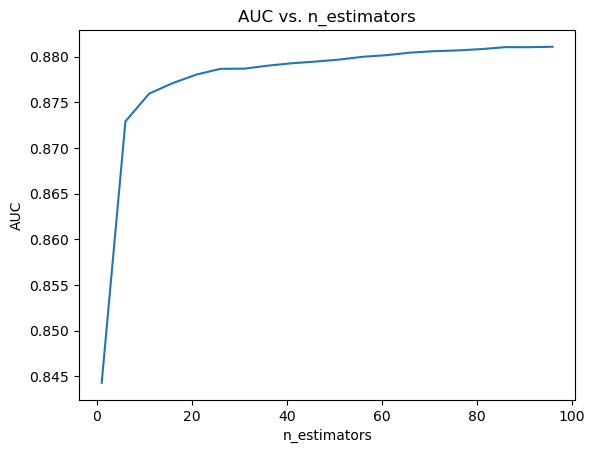

In [20]:
import matplotlib.pyplot as plt

plt.plot(n_estimators_range, accuracy_scores)
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

plt.plot(n_estimators_range, auc_scores)
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

# Building a Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
f = RandomForestClassifier(n_estimators=100,max_features='auto',random_state=42)
f.fit(x_train, np.ravel(y_train))
y_predicted=t.predict(x_test)

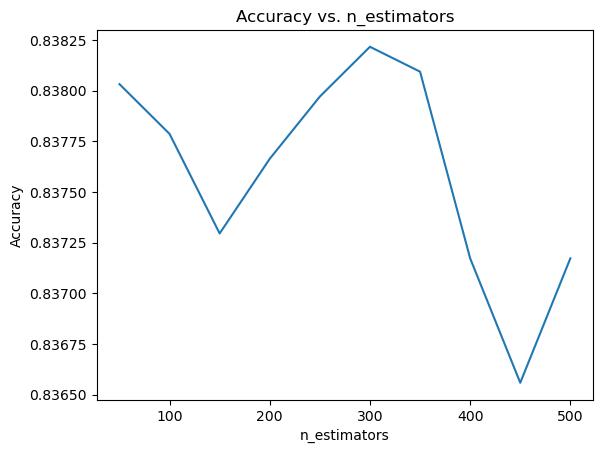

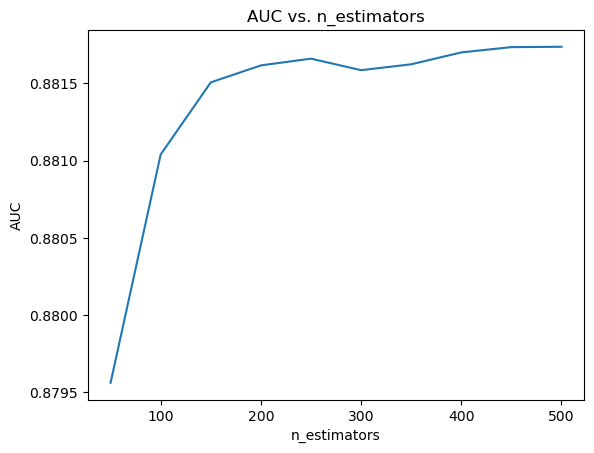

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

accuracy_scores = []
auc_scores = []

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(x_train, np.ravel(y_train))
    accuracy_scores.append(rf.score(x_test, y_test))
    auc_scores.append(metrics.roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))

plt.plot(n_estimators_range, accuracy_scores)
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

plt.plot(n_estimators_range, auc_scores)
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()


For both Accuracy and AUC, the scores increase as the number of estimators increases up to a certain point, then they plateau or even decrease slightly beyond that point.The improve scores become less significant as the number of estimators incease. 

Is there an optimal value of the estimator within the given range?
For both Accuracy and AUC, the optimal value of n_estimators appears to be around 150-250.

# Building AdaBoost, Gradient Boost, and XGB.

In [26]:
from sklearn.ensemble import AdaBoostClassifier

a = AdaBoostClassifier(n_estimators=100)
a.fit(x_train, np.ravel(y_train))
y_predicted=t.predict(x_test)

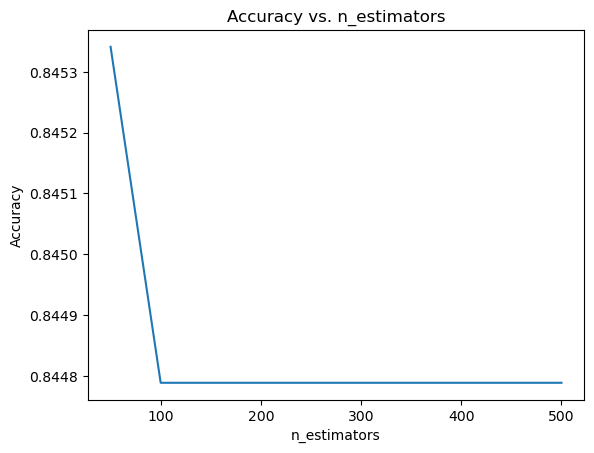

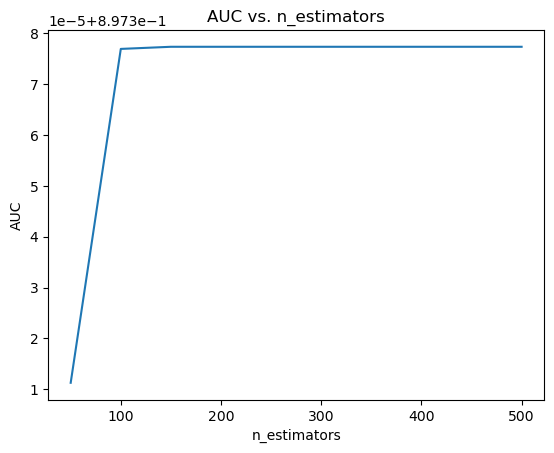

In [28]:
n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

accuracy_scores = []
auc_scores = []

for n_estimators in n_estimators_range:
    rf = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(x_train, np.ravel(y_train))
    accuracy_scores.append(rf.score(x_test, y_test))
    auc_scores.append(metrics.roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))

plt.plot(n_estimators_range, accuracy_scores)
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

plt.plot(n_estimators_range, auc_scores)
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

g = GradientBoostingClassifier(n_estimators=100)
g.fit(x_train,np.ravel(y_train))
y_predicted=t.predict(x_test)

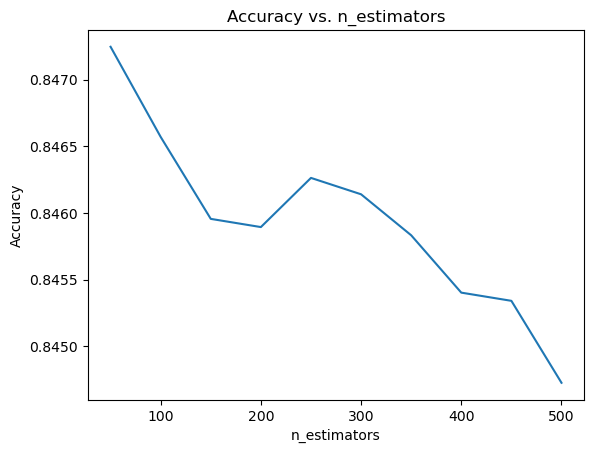

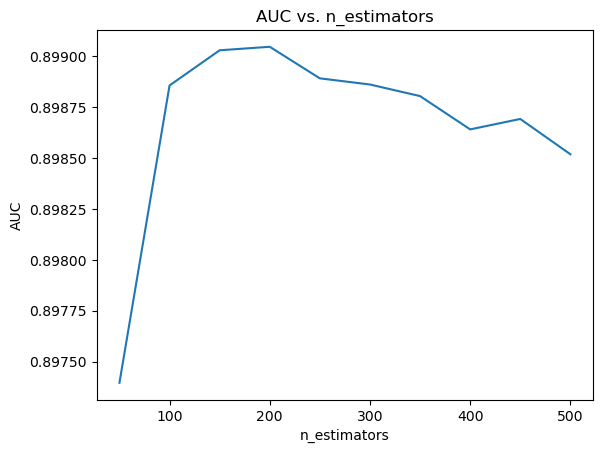

In [31]:
n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

accuracy_scores = []
auc_scores = []

for n_estimators in n_estimators_range:
    rf = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(x_train, np.ravel(y_train))
    accuracy_scores.append(rf.score(x_test, y_test))
    auc_scores.append(metrics.roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))

plt.plot(n_estimators_range, accuracy_scores)
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

plt.plot(n_estimators_range, auc_scores)
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [36]:
from xgboost import XGBClassifier

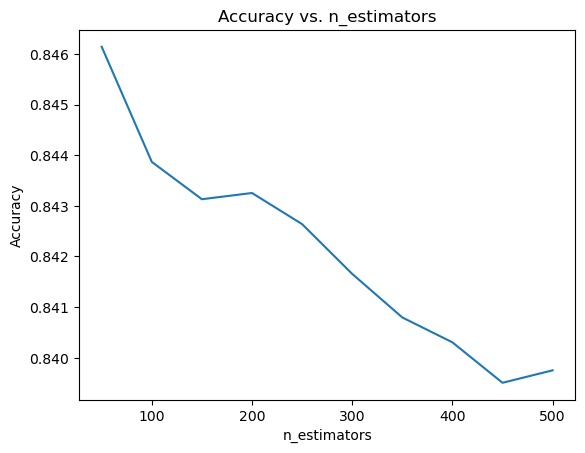

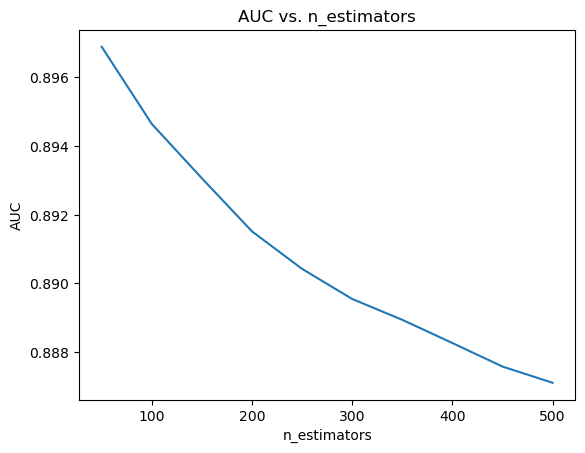

In [35]:
# Rename columns
x_train.columns = [c.replace('[','_').replace(']','_').replace('<','_') for c in x_train.columns]
x_test.columns = [c.replace('[','_').replace(']','_').replace('<','_') for c in x_test.columns]

# Train XGBoost model
n_estimators_range = [50,100,150,200,250,300,350,400,450,500]

accuracy_scores = []
auc_scores = []

for n_estimators in n_estimators_range:
    rf = XGBClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(x_train, np.ravel(y_train))
    accuracy_scores.append(rf.score(x_test, y_test))
    auc_scores.append(metrics.roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))

# Plot results
plt.plot(n_estimators_range, accuracy_scores)
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

plt.plot(n_estimators_range, auc_scores)
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

# Compare Performance

|         | Random Forest | Adaboost| Gradient Boost|XGB|
|----------|----------|----------|----------|----------|
| Accuracy | 0.83 | 0.84| 0.84| 0.89 |
| AUC | 0.88 | 0 | 0.89 | 0.85|


XGB has the highest accuracy and Gradiant Boost has the highest AUC